### Monitoring the localisation of free GCN4

Context:
- Just confirming that the GCN4 domain alone shows no membrane association

Results:
- It doesn't (looks identical to mNG)

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from src import (
    direcslist,
    load_image,
    nb_setup,
    raw_data_path,
    rotated_embryo,
    save_img,
)

nb_setup()
os.makedirs("Figs", exist_ok=True)
os.makedirs("../../../data/EMBO_source_data", exist_ok=True)

%matplotlib inline

2024-03-26 17:34:16.960364: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Images gcn4 vs control

/Users/blandt/Documents/PhDWork/Code/Bland-et-al-2023/src/../raw_data//Imaging/gcn4/210826_nwg383_tom4,5,60,500/02/
/Users/blandt/Documents/PhDWork/Code/Bland-et-al-2023/src/../raw_data//Imaging/mng/210804_nwg378_tom4,5,60,500/02/


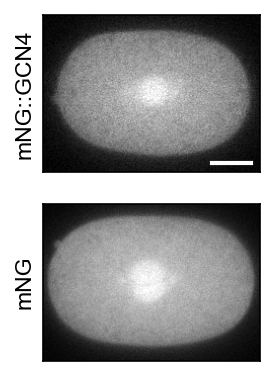

In [2]:
def panel(path, ax, scale_bar=False):
    img = load_image(path + "/af_corrected.tif")
    roi = np.loadtxt(path + "/ROI_manual.txt")
    rotated = rotated_embryo(img, roi, 220, 160, 3)
    ax.imshow(rotated, cmap="gray", vmin=0, vmax=np.percentile(rotated, 99.9))
    ax.set_xticks([])
    ax.set_yticks([])

    if scale_bar:
        px = 0.255  # pixel size
        bar_length = 10  # microns
        bar_pixels = bar_length / px
        y = rotated.shape[0] - 10
        ax.plot(
            [rotated.shape[1] - 10 - bar_pixels, rotated.shape[1] - 10],
            [y, y],
            color="w",
            linewidth=2,
        )


if raw_data_path:
    # Specify paths to images
    path_gcn4 = direcslist(
        [
            raw_data_path + "/Imaging/gcn4/210826_nwg383_tom4,5,60,500/",
            raw_data_path + "/Imaging/gcn4/210826_nwg384_tom4,5,60,500/",
        ],
        0,
    )[2]
    print(path_gcn4)

    path_ctrl = direcslist(
        raw_data_path + "/Imaging/mng/210804_nwg378_tom4,5,60,500/", 0
    )[1]
    print(path_ctrl)

    # Create figure
    fig, ax = plt.subplots(2, 1)
    panel(path_gcn4, ax[0], scale_bar=True)
    panel(path_ctrl, ax[1])

    # Format figure
    ax[0].set_ylabel("mNG::GCN4", fontsize=11)
    ax[1].set_ylabel("mNG", fontsize=11)
    fig.set_size_inches(2.5, 3)

    # Save
    fig.savefig("Figs/imgs_fragment.png", dpi=600, transparent=True)
    fig.savefig("Figs/imgs_fragment.pdf", transparent=True)

    # SourceData
    os.makedirs("../../../data/EMBO_source_data/4C", exist_ok=True)
    save_img(
        load_image(path_gcn4 + "/af_corrected.tif"),
        "../../../data/EMBO_source_data/4C/gcn4.tif",
    )
    save_img(
        load_image(path_ctrl + "/af_corrected.tif"),
        "../../../data/EMBO_source_data/4C/ctrl.tif",
    )